In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../data/cleaned_data.csv", index_col=0)
df.head()

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction


<Axes: xlabel='Price', ylabel='Count'>

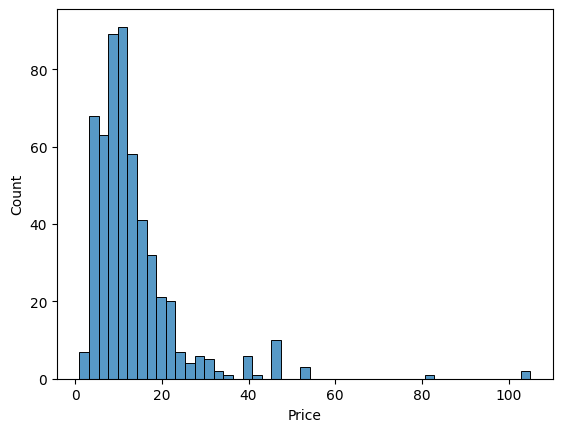

In [4]:
# Wie sind eigentlich die Preise verteilt

sns.histplot(df, x="Price")

### Wie sind die Autoren verteilt?

<Axes: xlabel='count', ylabel='Count'>

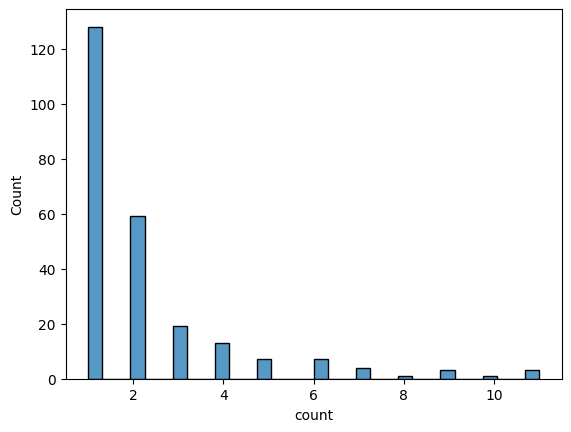

In [28]:


author_counts = df["Author"].value_counts()
author_counts = author_counts.reset_index()

sns.histplot(author_counts, x="count")

### Welche Autoren tauchen am häufigsten auf?

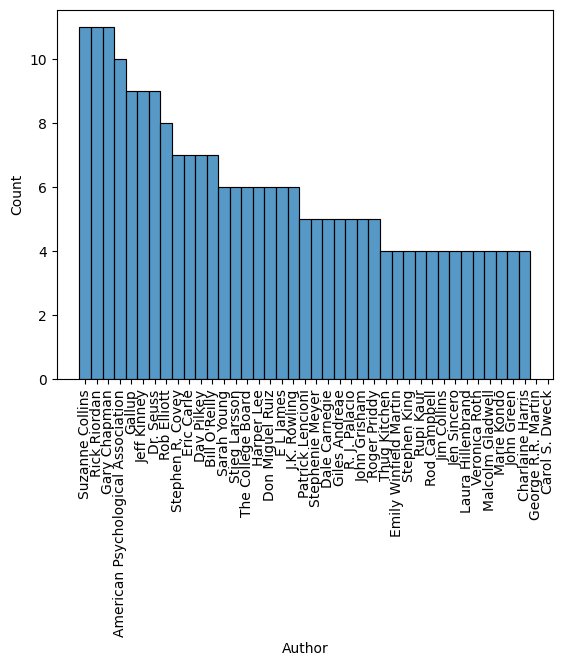

In [ ]:
# Welche Autoren haben die meisten listings
# Welche Autoren tauchen am häufigsten auf?
import matplotlib.pyplot as plt


author_counts = df['Author'].value_counts()

mask = df['Author'].isin(author_counts[author_counts > 3].index)

sorted_authors = author_counts.sort_values(ascending=False).index
df['Author'] = pd.Categorical(
    df['Author'], categories=sorted_authors, ordered=True)

sns.histplot(df[mask], x="Author")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Year', ylabel='count'>

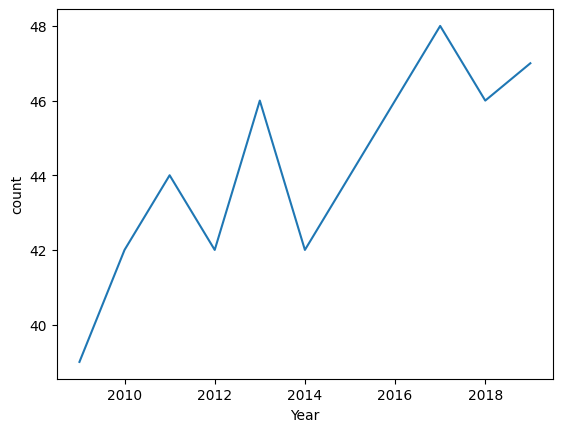

In [ ]:
# Wie viele verschiedene Autoren sind je Jahr in den Top 50
import seaborn as sns

df_gorupby_author_year_count = df[["Author", "Year"]].groupby(
    "Year").value_counts().to_frame()


df_gorupby_author_year_count.reset_index(inplace=True)

df_gorupby_author_year_count["Year"].value_counts()

sns.lineplot(df_gorupby_author_year_count["Year"].value_counts())

### Wie haben sich die Buchpreise über die Jahre entwickelt?

<Axes: xlabel='Year', ylabel='Price'>

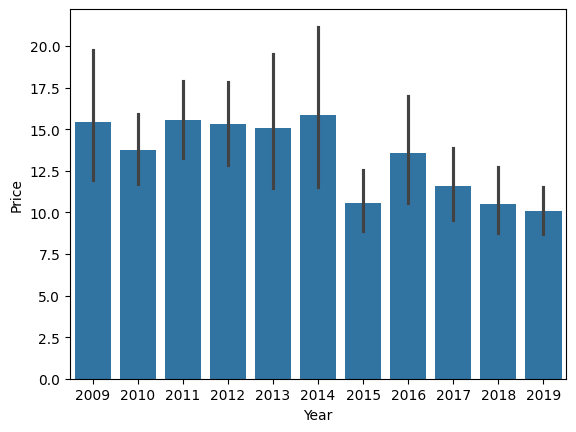

In [29]:
sns.barplot(data = df, y='Price', x='Year')

(0.0, 20.0)

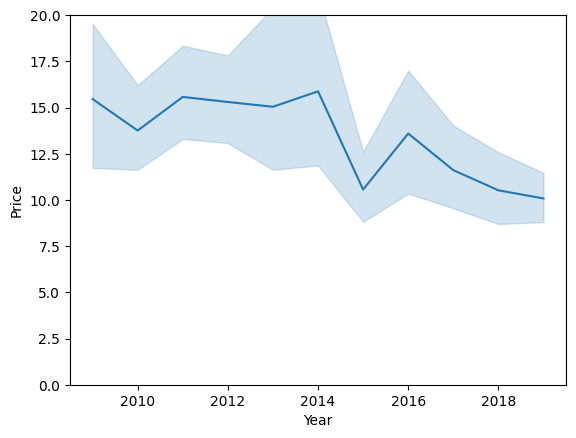

In [31]:
sns.lineplot(data = df, y='Price', x='Year')
plt.ylim([0,20])

### Welche Bücher tauchen am häufigsten auf?

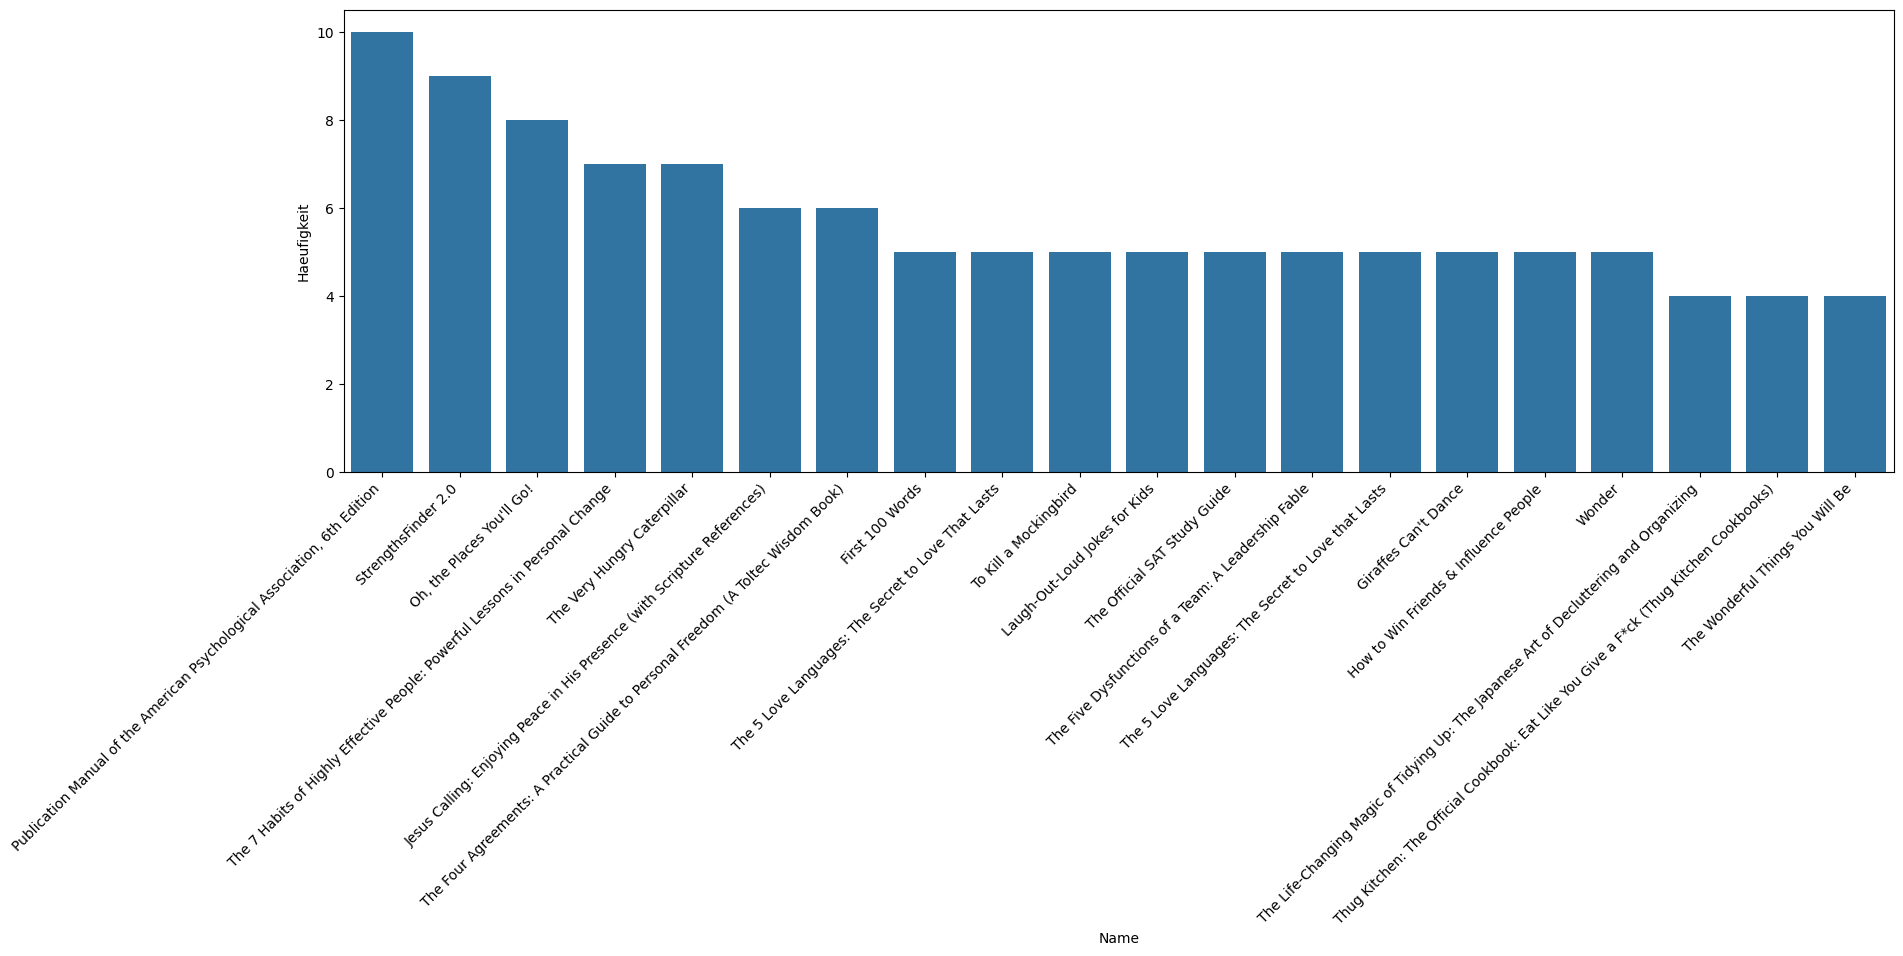

In [33]:
df_frequency_books = df.groupby("Name", as_index=False).agg(
    Haeufigkeit=("Name", "count")).sort_values("Haeufigkeit", ascending=False)
top_books = df_frequency_books.nlargest(20, "Haeufigkeit")

plt.figure(figsize=(20, 6))
sns.barplot(top_books, x="Name", y="Haeufigkeit")

plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:


# Gibt es einen Zusammenhang zwischen Anzahl an Reviews und der Häufigkeit der Bücher in den Top 50
# Wie sind die User Ratings verteilt?
# Gibt es einen Zusammenhang zwischen Preis und Anzahl der Reviews?
# Gibt es einen Zusammenhang zwischen User Rating und Reviews

#### Welches Genre ist beliebter? War das schon immer so?

In [49]:
import plotly.express as px


genre = df.groupby('Year', as_index=False)['Genre'].value_counts().sort_values(by='Year')


px.bar(
    genre,
    x='Year',
    y='count',
    color='Genre',
    barmode='group'
)


### Wie sid die Reviews verteilt?

<Axes: xlabel='Reviews', ylabel='Count'>

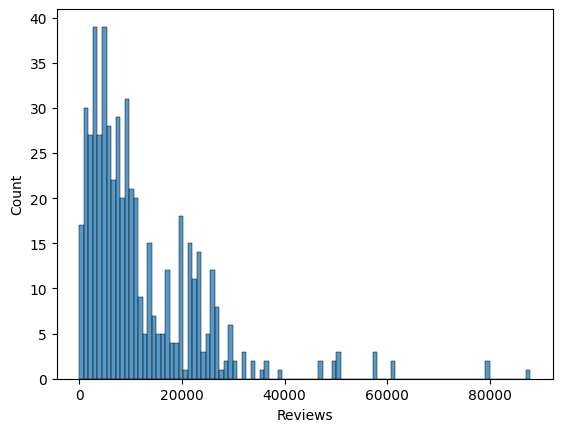

In [51]:
sns.histplot(df, x="Reviews", bins=100)

<Axes: xlabel='User Rating', ylabel='Reviews'>

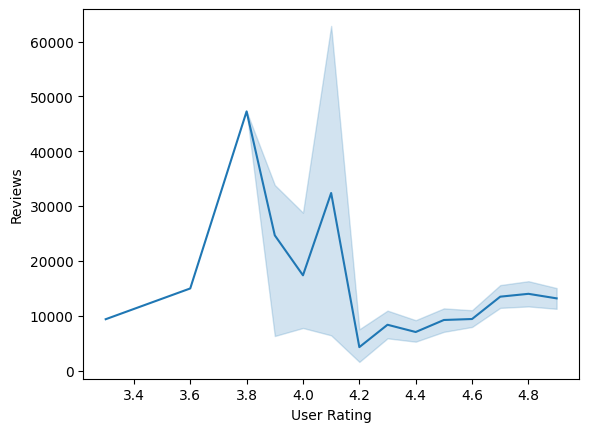

In [52]:
sns.lineplot(df, x="User Rating", y="Reviews")

In [56]:
review_verteilung = df[["User Rating", "Reviews"]].groupby("User Rating").sum()
display(review_verteilung)

px.bar(review_verteilung)

,Reviews
User Rating,
3.3,9372
3.6,14982
3.8,94530
3.9,73998
4.0,243266
4.1,194305
4.2,34268
4.3,209072
4.4,267481
